# Linear Regression for Bike Sharing Demand (Kaggle)
The data has the following features:  
1. datetime - hourly date + timestamp  
2. season - 1 = spring, 2 = summer, 3 = fall, 4 = winter  
3. holiday - whether the day is considered a holiday  
4. workingday - whether the day is neither a weekend nor holiday  
5. weather -  
   1: Clear, Few clouds, Partly cloudy, Partly cloudy  
   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
   4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
6. temp - temperature in Celsius  
7. atemp - "feels like" temperature in Celsius  
8. humidity - relative humidity  
9. windspeed - wind speed  
10. casual - number of non-registered user rentals initiated  
11. registered - number of registered user rentals initiated  
12. count - number of total rentals

In [2]:
df <- read.csv('bikeshare.csv')
head(df)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [3]:
dim(df)

[1] 10886    12

In [4]:
library(ggplot2)

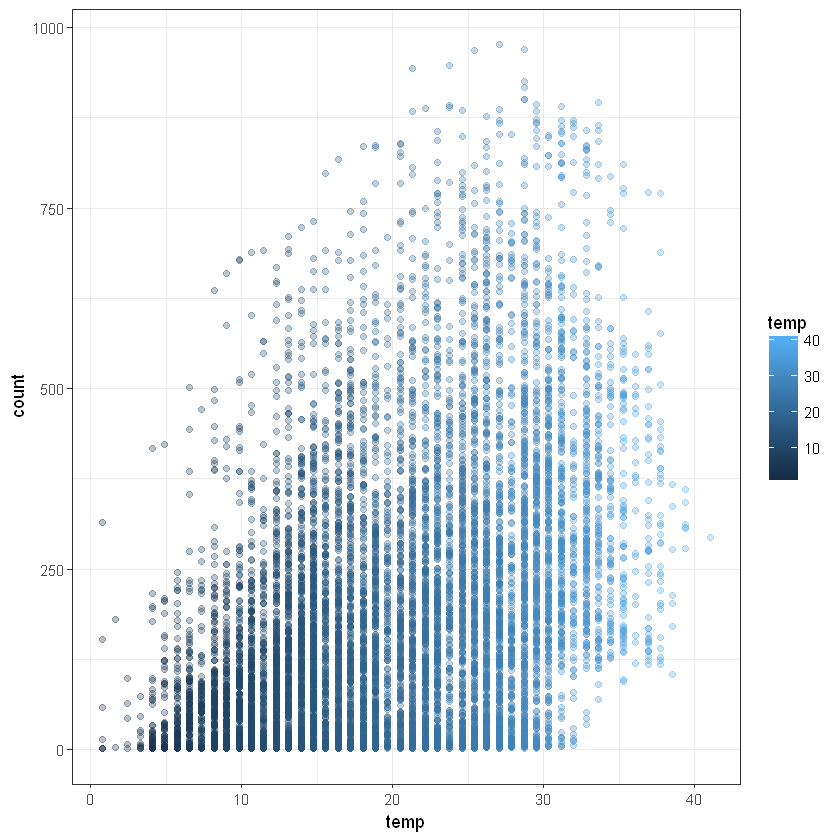

In [5]:
ggplot(df, aes(temp, count)) + geom_point(alpha=0.3, aes(color=temp)) + theme_bw()

In [6]:
df$datetime <- as.POSIXct(df$datetime)

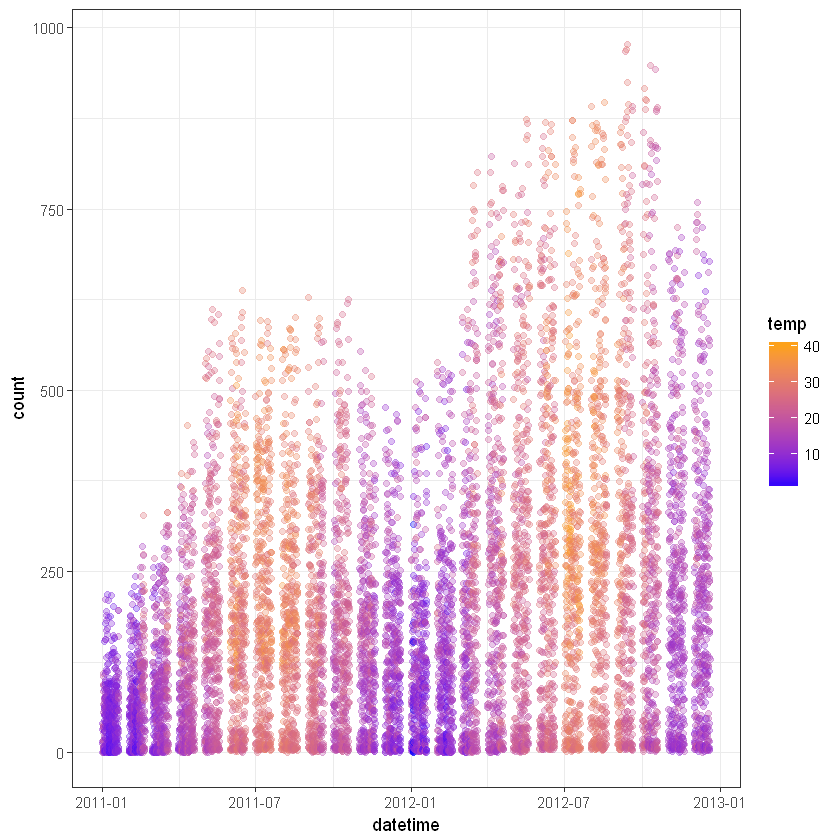

In [7]:
ggplot(df, aes(datetime, count)) + geom_point(alpha=0.3, aes(color=temp)) + theme_bw() + scale_color_gradient(low = 'blue', high = 'orange')

In [8]:
cor(df[, c('temp', 'count')])

,temp,count
temp,1.0000000,0.3944536
count,0.3944536,1.0000000


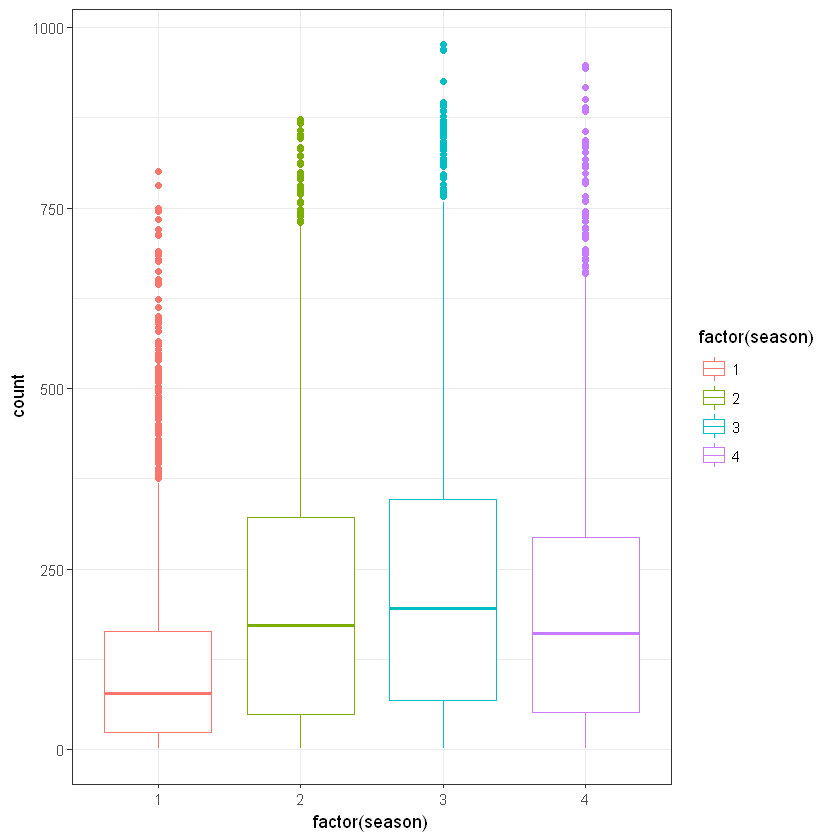

In [9]:
ggplot(df, aes(factor(season), count)) + geom_boxplot(aes(color=factor(season))) + theme_bw()

In [10]:
df$hour <- format(df$datetime, "%H")

In [11]:
head(df)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


In [23]:
df2 <- subset(df, workingday==1)
head(df2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
48,2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,00
49,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,01
50,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,04
51,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,05
52,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,06
53,2011-01-03 07:00:00,1,0,1,1,5.74,6.820,50,12.9980,1,63,64,07


In [24]:
dim(df2)

[1] 7412   13

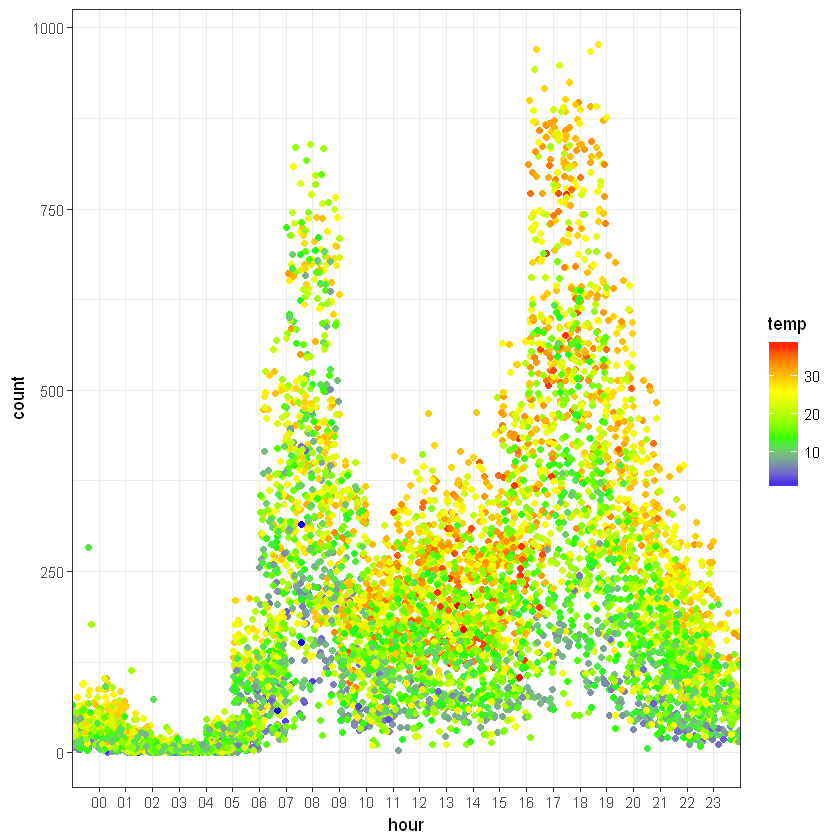

In [34]:
ggplot(df2, aes(hour, count)) + geom_point(aes(color=temp), position=position_jitter(w=1, h=0)) + theme_bw() + scale_color_gradientn(colors=c('blue', 'green', 'yellow', 'red'))

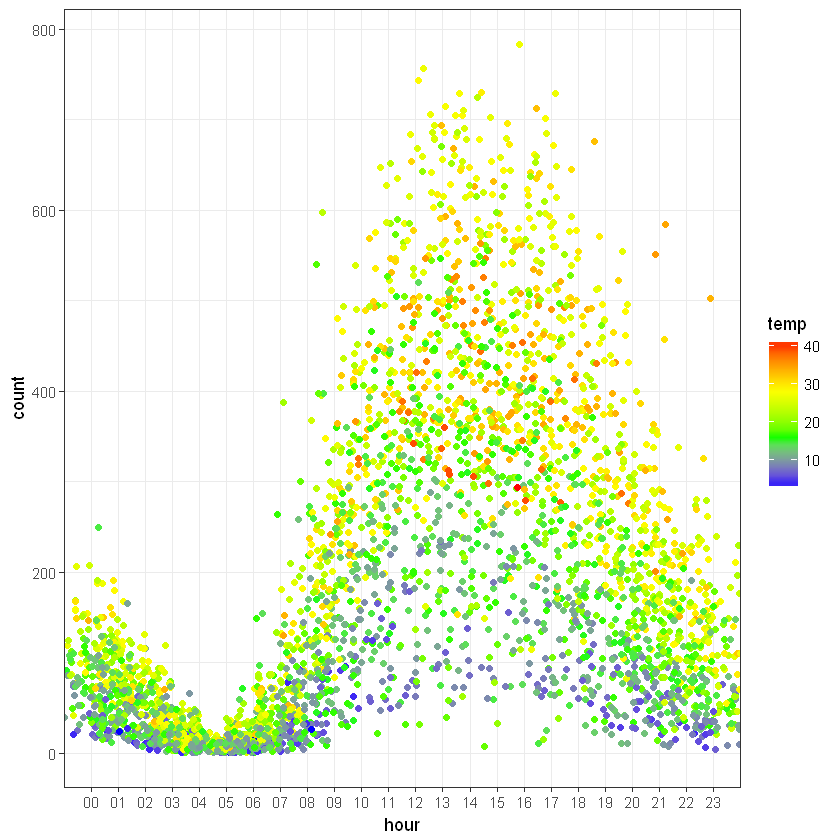

In [35]:
df3 <- subset(df, workingday==0)
ggplot(df3, aes(hour, count)) + geom_point(aes(color=temp), position=position_jitter(w=1, h=0)) + theme_bw() + scale_color_gradientn(colors=c('blue', 'green', 'yellow', 'red'))

In [36]:
temp.model <- lm(count ~ temp, df)

In [37]:
summary(temp.model)


Call:
lm(formula = count ~ temp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.0462     4.4394   1.362    0.173    
temp          9.1705     0.2048  44.783   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16


In [53]:
test <- data.frame('temp' = 25)
test

temp
25


In [54]:
predict(temp.model, test)

1 
235.3097

In [55]:
6.0462 + 25 * 9.1705

[1] 235.3087

In [56]:
class(df$hour)

[1] "character"

In [59]:
df$hour <- sapply(df$hour, as.numeric)

In [60]:
class(df$hour)

[1] "numeric"

In [61]:
str(df)

'data.frame':	10886 obs. of  13 variables:
 $ datetime  : POSIXct, format: "2011-01-01 00:00:00" "2011-01-01 01:00:00" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weather   : int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  9.84 9.02 9.02 9.84 9.84 ...
 $ atemp     : num  14.4 13.6 13.6 14.4 14.4 ...
 $ humidity  : int  81 80 80 75 75 75 80 86 75 76 ...
 $ windspeed : num  0 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ count     : int  16 40 32 13 1 1 2 3 8 14 ...
 $ hour      : num  0 1 2 3 4 5 6 7 8 9 ...


In [62]:
model <- lm(count ~ . - atemp - datetime - casual - registered, df)
summary(model)


Call:
lm(formula = count ~ . - atemp - datetime - casual - registered, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.61  -96.88  -31.01   55.27  688.83 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.91369    8.45147   5.551 2.91e-08 ***
season       21.70333    1.35409  16.028  < 2e-16 ***
holiday     -10.29914    8.79069  -1.172    0.241    
workingday   -0.71781    3.14463  -0.228    0.819    
weather      -3.20909    2.49731  -1.285    0.199    
temp          7.01953    0.19135  36.684  < 2e-16 ***
humidity     -2.21174    0.09083 -24.349  < 2e-16 ***
windspeed     0.20271    0.18639   1.088    0.277    
hour          7.61283    0.21688  35.102  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 147.8 on 10877 degrees of freedom
Multiple R-squared:  0.3344,	Adjusted R-squared:  0.3339 
F-statistic:   683 on 8 and 10877 DF,  p-value: < 2.2e-16


In [75]:
pred <- predict(model, df)

In [76]:
results <- cbind(pred, actual=df$count)
dim(results)

[1] 10886     2

In [77]:
head(results)

,pred,actual
1,-44.6706075,16
2,-40.6020591,40
3,-32.9892336,32
4,-8.5617086,13
5,-0.9488831,1
6,4.6717724,1


In [78]:
to_zero <- function(x){
    if (x < 0){
        return(0)
    }else{
        return(x)
    }
}

In [83]:
results <- as.data.frame(results)
str(results)

'data.frame':	10886 obs. of  2 variables:
 $ pred  : num  -44.671 -40.602 -32.989 -8.562 -0.949 ...
 $ actual: num  16 40 32 13 1 1 2 3 8 14 ...


In [85]:
results$pred <- sapply(results$pred, to_zero)

In [86]:
head(results)

pred,actual
0.000000,16
0.000000,40
0.000000,32
0.000000,13
0.000000,1
4.671772,1


In [87]:
mse <- mean((results$actual - results$pred)^2)
mse

[1] 21770.73

In [98]:
res <- as.data.frame(residuals(model))
colnames(res) <- 'residual'
head(res)

residual
60.670607
80.602059
64.989234
21.561709
1.948883
-3.671772


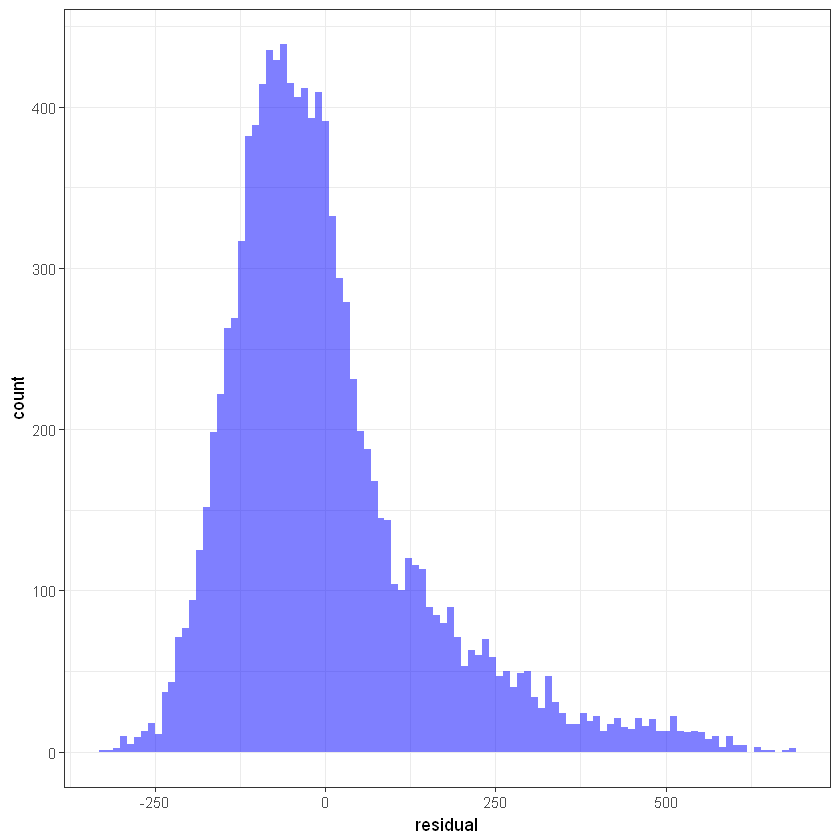

In [100]:
ggplot(res, aes(residual)) + geom_histogram(fill='blue', alpha=0.5, bins = 100) + theme_bw()